In [1]:
## import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
## read the data
data=pd.read_excel('Parking.xls')

In [3]:
## eyeball the data
df=data
df.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [4]:
## to check the counts and types of building status
df['Bldg Status'].value_counts()

ACTIVE            8981
EXCESS              70
DECOMMISSIONED       9
Name: Bldg Status, dtype: int64

In [5]:
## to check the counts and types of property type
df['Property Type'].value_counts()


BUILDING     8602
STRUCTURE     339
LAND          119
Name: Property Type, dtype: int64

In [6]:
## to check top 10 states with most number of buildings
df['Bldg State'].value_counts().head(10)

TX    886
CA    746
DC    486
VA    440
FL    413
MD    403
NY    367
PA    245
CO    242
WA    242
Name: Bldg State, dtype: int64

In [7]:
## to check top 10 cities with most number of buildings
df['Bldg City'].value_counts().head(10)

WASHINGTON     487
EL PASO         89
LAREDO          81
SPRINGFIELD     79
LAKEWOOD        79
ARLINGTON       78
SAN DIEGO       64
KANSAS CITY     63
ATLANTA         63
CHICAGO         62
Name: Bldg City, dtype: int64

## 1. what is the distribution for owned/leased?

In [8]:
df.columns

Index(['Bldg City', 'Bldg State', 'Bldg Status', 'Property Type',
       'Total Parking Spaces', 'Owned/Leased'],
      dtype='object')

In [9]:
## we can further see the counts by pivot table option
owned_leased=pd.pivot_table(df,index='Owned/Leased',values='Total Parking Spaces')

In [10]:
owned_leased

,Total Parking Spaces
Owned/Leased,
LEASED,44.707349
OWNED,74.627358


In [11]:
## we see that by default it shows us the mean value we can change it
owned_leased=pd.pivot_table(df,index='Owned/Leased',values='Total Parking Spaces',aggfunc='count')
owned_leased

,Total Parking Spaces
Owned/Leased,
LEASED,6940
OWNED,2120


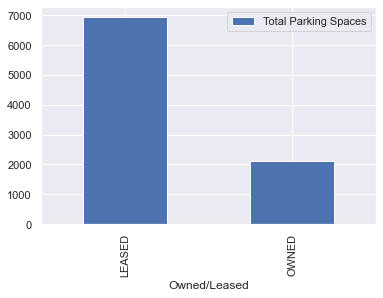

In [12]:
## we can plot the bar chart for this
owned_leased.plot(kind='bar')
plt.show()

## 2. In which states the parking situation is in excess

In [13]:
df.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [14]:
excess_buildings=pd.pivot_table(df,index='Bldg State',columns='Bldg Status',values='Total Parking Spaces')

In [15]:
excess_buildings

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
AR,37.000000,NaN,NaN
AZ,32.256757,NaN,NaN
CA,60.493298,NaN,NaN
CO,78.936709,NaN,22.200000
CT,29.327586,NaN,NaN
DC,41.255144,NaN,NaN
DE,15.750000,NaN,NaN
FL,51.905569,NaN,NaN


In [16]:
## we see that there are many NaN values in excess columns so we remove them
excess_buildings=excess_buildings[excess_buildings['EXCESS']>0]

In [17]:
excess_buildings

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
CO,78.936709,NaN,22.200000
IL,45.000000,NaN,21.000000
LA,43.684932,NaN,68.666667
MD,104.185090,0.000000,43.166667
MO,121.200000,815.333333,254.272727
NE,54.060000,NaN,19.000000
NJ,32.169118,NaN,4.300000
NV,48.648649,NaN,173.000000


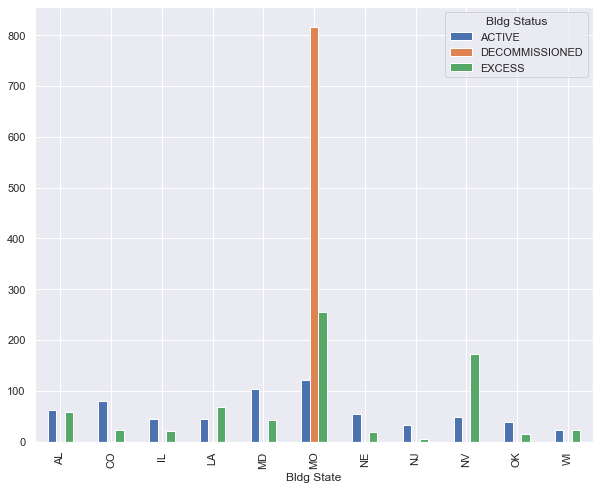

In [18]:
# we can put them on the graph

excess_buildings.plot(kind='bar',figsize=(10,8))
plt.show()

In [19]:
# but as per the question we need only EXCESS buildings with order

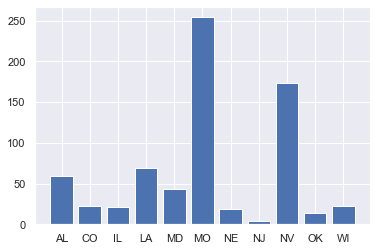

In [20]:
plt.bar(excess_buildings.index,excess_buildings['EXCESS'])
plt.show()

In [21]:
## but we need it sorted

In [22]:
excess_buildings_sorted=excess_buildings['EXCESS'].sort_values(ascending=False)
excess_buildings_sorted

Bldg State
MO    254.272727
NV    173.000000
LA     68.666667
AL     59.000000
MD     43.166667
CO     22.200000
WI     22.000000
IL     21.000000
NE     19.000000
OK     14.000000
NJ      4.300000
Name: EXCESS, dtype: float64

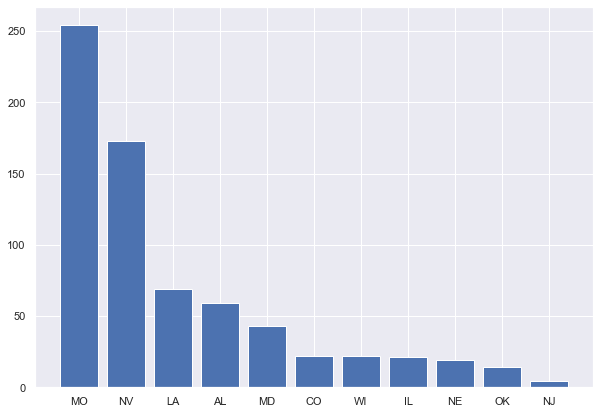

In [23]:
plt.figure(figsize=(10,7))
plt.bar(excess_buildings_sorted.index,excess_buildings_sorted.values)
plt.show()

## 3. Building cities that have been decommissioned along with total parking

In [24]:
df.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [25]:
## we can filter the data 
decom=df[df['Bldg Status']=='DECOMMISSIONED']
decom

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
429,PORTHILL,ID,DECOMMISSIONED,BUILDING,0,OWNED
1933,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
1934,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
2338,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
2348,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
5716,OVERLAND,MO,DECOMMISSIONED,BUILDING,2089,OWNED
5725,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,357,OWNED
5726,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,0,OWNED
6752,FORT WORTH,TX,DECOMMISSIONED,BUILDING,0,OWNED


In [26]:
## we see only two cities where parking spaces have been decommissioned

In [27]:
decom=df[(df['Bldg Status']=='DECOMMISSIONED') & (df['Total Parking Spaces']>0)]
decom

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
5716,OVERLAND,MO,DECOMMISSIONED,BUILDING,2089,OWNED
5725,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,357,OWNED


## 4. In which type of property the parking spaces are in excess?


In [28]:
excess_prop=pd.pivot_table(df[df['Bldg Status']=='EXCESS'],index='Property Type',values='Total Parking Spaces')
excess_prop

,Total Parking Spaces
Property Type,
BUILDING,57.791045
STRUCTURE,37.000000


## 5. Where are more number of active parkings available- Owned/Leased

In [31]:
active_parking=pd.pivot_table(df[df['Bldg Status']=='ACTIVE'],index='Owned/Leased', values='Total Parking Spaces')
active_parking

,Total Parking Spaces
Owned/Leased,
LEASED,44.707349
OWNED,74.365997


# 5. states with more number of leased parkings

In [33]:
more_leased=pd.pivot_table(df[df['Owned/Leased']=='LEASED'],index='Bldg City', values='Total Parking Spaces')
more_leased.sort_values('Total Parking Spaces',ascending=False)

,Total Parking Spaces
Bldg City,
BOYERS,1201.000000
HARAHAN,640.000000
WOODLAWN,564.333333
RESTON,497.833333
SUMNER,450.000000
...,...
SELINSGROVE,0.000000
CANON CITY,0.000000
DUNMORE,0.000000


## 6. Which property type has more active parking?

In [34]:
df.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [35]:
more_active=pd.pivot_table(df[df['Bldg Status']=='ACTIVE'],index='Property Type',values='Total Parking Spaces')
more_active

,Total Parking Spaces
Property Type,
BUILDING,51.134764
LAND,19.268908
STRUCTURE,70.779762


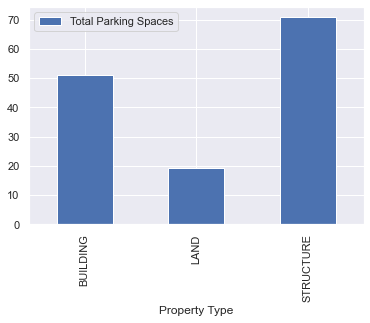

In [37]:
## we scan plol this as
more_active.plot(kind='bar')
plt.show()

In [38]:
## clearly structure property type has more parking spaces

## 7. How is the distribution of parking in city by property type?

In [40]:
dis_prop=pd.pivot_table(df,index='Bldg City',columns='Property Type',values='Total Parking Spaces')
dis_prop

Property Type,BUILDING,LAND,STRUCTURE
Bldg City,,,
ABERDEEN,35.909091,NaN,NaN
ABILENE,13.333333,NaN,NaN
ABINGDON,6.333333,NaN,NaN
ACCOMAC,25.000000,NaN,NaN
ADA,20.000000,NaN,NaN
...,...,...,...
YUCCA VALLEY,24.000000,NaN,NaN
YUMA,21.357143,NaN,NaN
ZANESVILLE,75.000000,NaN,NaN


## 8. Building states that have zero parking spaces.

In [41]:
df.columns


Index(['Bldg City', 'Bldg State', 'Bldg Status', 'Property Type',
       'Total Parking Spaces', 'Owned/Leased'],
      dtype='object')

In [42]:
zero_park=df[df['Total Parking Spaces']==0]
zero_park

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
11,EAST HARTFORD,CT,ACTIVE,BUILDING,0,LEASED
31,NEW LONDON,CT,ACTIVE,BUILDING,0,LEASED
35,NEW HAVEN,CT,ACTIVE,BUILDING,0,LEASED
...,...,...,...,...,...,...
9013,ELY,NV,ACTIVE,BUILDING,0,LEASED
9015,ELKO,NV,ACTIVE,BUILDING,0,LEASED
9029,RENO,NV,ACTIVE,BUILDING,0,LEASED
9042,LAS VEGAS,NV,ACTIVE,BUILDING,0,LEASED


In [45]:
states_zero=zero_park.groupby(['Bldg State'])['Total Parking Spaces'].sum()
states_zero

Bldg State
AL    0
AR    0
AZ    0
CA    0
CO    0
CT    0
DC    0
DE    0
FL    0
GA    0
IA    0
ID    0
IL    0
IN    0
KS    0
KY    0
LA    0
MA    0
MD    0
ME    0
MI    0
MN    0
MO    0
MS    0
MT    0
NC    0
ND    0
NE    0
NH    0
NJ    0
NM    0
NV    0
NY    0
OH    0
OK    0
OR    0
PA    0
RI    0
SC    0
SD    0
TN    0
TX    0
UT    0
VA    0
VT    0
WA    0
WI    0
WV    0
WY    0
Name: Total Parking Spaces, dtype: int64

In [46]:
# above mentioned states are the states with zero parking spaces

## 9. Which states have max and min parking spaces

In [49]:
space=df.groupby(['Bldg State'])['Total Parking Spaces'].sum()
space

Bldg State
AL     7729
AR     3071
AZ     7161
CA    45128
CO    18819
CT     1701
DC    20050
DE      441
FL    21437
GA    16657
IA     2013
ID     2435
IL    10821
IN     6346
KS     4086
KY     6340
LA     6584
MA     7100
MD    41046
ME     1641
MI     9778
MN     4255
MO    28877
MS     3820
MT     2299
NC     7419
ND     1078
NE     2722
NH     1703
NJ     4418
NM     6221
NV     3773
NY    14150
OH     7763
OK     5059
OR     3342
PA     9349
RI      679
SC     3493
SD     1501
TN     8198
TX    48301
UT     7993
VA    31122
VT     2600
WA    10633
WI     2835
WV     3320
WY     1172
Name: Total Parking Spaces, dtype: int64

In [54]:
space_sorted=space.sort_values(ascending=False)
space_sorted

Bldg State
TX    48301
CA    45128
MD    41046
VA    31122
MO    28877
FL    21437
DC    20050
CO    18819
GA    16657
NY    14150
IL    10821
WA    10633
MI     9778
PA     9349
TN     8198
UT     7993
OH     7763
AL     7729
NC     7419
AZ     7161
MA     7100
LA     6584
IN     6346
KY     6340
NM     6221
OK     5059
NJ     4418
MN     4255
KS     4086
MS     3820
NV     3773
SC     3493
OR     3342
WV     3320
AR     3071
WI     2835
NE     2722
VT     2600
ID     2435
MT     2299
IA     2013
NH     1703
CT     1701
ME     1641
SD     1501
WY     1172
ND     1078
RI      679
DE      441
Name: Total Parking Spaces, dtype: int64

In [60]:
## max parking space
space_sorted.head(1)

Bldg State
TX    48301
Name: Total Parking Spaces, dtype: int64

In [61]:
# min parking space
space_sorted.tail(1)

Bldg State
DE    441
Name: Total Parking Spaces, dtype: int64